<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-общей-информации" data-toc-modified-id="Изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение общей информации</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Меняем-типы,-удаляем-лишнее" data-toc-modified-id="Меняем-типы,-удаляем-лишнее-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Меняем типы, удаляем лишнее</a></span></li><li><span><a href="#Создадим-новые-столбцы-и-датафреймы" data-toc-modified-id="Создадим-новые-столбцы-и-датафреймы-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Создадим новые столбцы и датафреймы</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Помесячная-выручка" data-toc-modified-id="Помесячная-выручка-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Помесячная выручка</a></span></li><li><span><a href="#Визуализация" data-toc-modified-id="Визуализация-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Визуализация</a></span></li><li><span><a href="#Метрики" data-toc-modified-id="Метрики-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Метрики</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Первая-гипотеза" data-toc-modified-id="Первая-гипотеза-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Первая гипотеза</a></span></li><li><span><a href="#Вторая-гипотеза" data-toc-modified-id="Вторая-гипотеза-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Вторая гипотеза</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Анализ тарифов

Данные - 5 таблиц с различной информацией о 500 пользователях оператора сотовой связи "Мегалайн" за 2018 год.  
Цель - понять какой тариф приносит больше денег.

Описание данных:


Таблица `users` — информация о пользователях:
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, значит, тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана


Таблица `calls` — информация о звонках:
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок


Таблица `messages` — информация о сообщениях:
- id — уникальный номер звонка
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение


Таблица `internet` — информация об интернет-сессиях:
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя


Таблица `tariffs` — информация о тарифах:
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со - 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Описание тарифов:   

Тариф `"Смарт"`:  
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
    - Минута разговора — 3 рубля. Количество использованных минут и мегабайтов «Мегалайн» всегда округляет вверх. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.
    - Сообщение — 3 рубля.
    - 1 Гб интернет-трафика — 200 рублей.  
    
    
Тариф `"Ультра"`:  
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
    - Минута разговора — 1 рубль. Количество использованных минут и мегабайтов «Мегалайн» всегда округляет вверх. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.
    - Сообщение — 1 рубль.
    - 1 Гб интернет-трафика: 150 рублей.

## Изучение общей информации

In [1]:
import pandas as pd  # Импортируем необходимые библиотеки
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

calls = pd.read_csv('calls.csv')  # Читаем наши 5 таблиц
sessions = pd.read_csv('internet.csv')
messages = pd.read_csv('messages.csv')
tariffs = pd.read_csv('tariffs.csv')
users = pd.read_csv('users.csv')

In [2]:
def total_info(data):  # Создаем функцию для вывода общей информации
    result = display(data.info(), data.head())
    return result

In [3]:
total_info(calls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


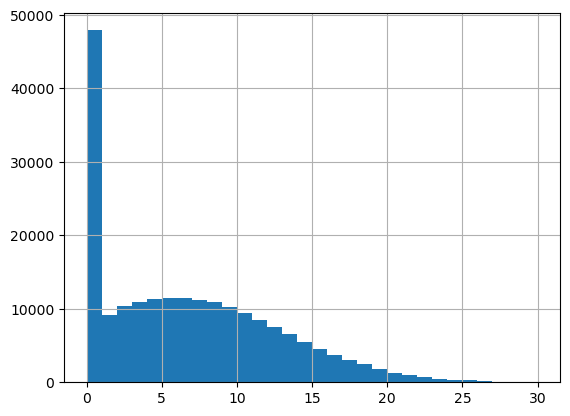

In [4]:
calls['duration'].hist(bins=30, range=(0, 30));

Много нулевых значений. Вероятно это неотвеченные звонки.

---

In [5]:
total_info(sessions)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


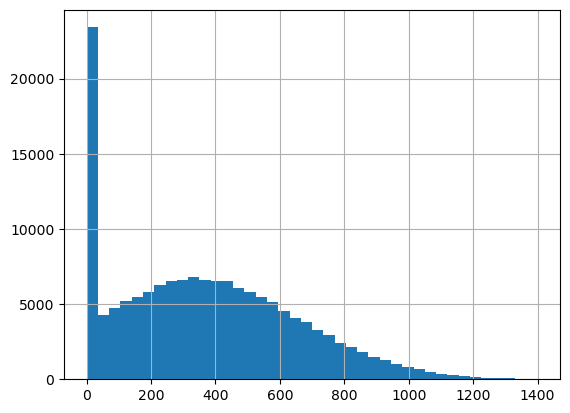

In [6]:
sessions['mb_used'].hist(bins=40, range=(0, 1400));

Здесь также много нулевых значений. Возможно они означают сбой подключения и/или сессию до 10-15 секунд. Оставляем.

---

In [7]:
total_info(messages)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [8]:
total_info(tariffs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [9]:
total_info(users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<div class='alert alert-info'><b>

    
- Названия столбцов в порядке, но есть лишний - Unnamed: 0.
- У всех столбцов с датами тип данных - object. Исправим.
- Пропуски только в таблице users в столбце churn_date. Из описания данных известно, что это означает - тариф ещё действовал на момент выгрузки данных. Не трогаем.
</b></div>

## Подготовка данных

### Меняем типы, удаляем лишнее

In [10]:
sessions = sessions.drop('Unnamed: 0', axis=1)  # Удалим лишний столбец

**Приведем** столбцы с датами к соответствующему типу данных

In [11]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
sessions['session_date'] = pd.to_datetime(sessions['session_date'], format='%Y-%m-%d')

**Округлим** значения столбца `duration` и приведем к типу int. Из описания тарифов известно, что тарификация поминутная, то есть даже если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

In [12]:
calls['duration'] = np.ceil(calls['duration']).astype('int')

### Создадим новые столбцы и датафреймы

**Создадим** новые столбцы в таблицах calls, messages, sessions со значениями месяцев для определения платежного периода

In [13]:
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
sessions['month'] = sessions['session_date'].dt.month

**Создадим** датафреймы с информацией о количестве:
- совершенных звонков - `calls_per_month`
- израсходованных минут разговора - `minutes_per_month`
- отправленных сообщений - `messages_per_month`
- потраченных мегабайт - `sessions_per_month`


сгрупированные для каждого пользователя по id и по месяцам

In [14]:
calls_per_month = calls.groupby(['user_id', 'month']).agg(calls=('duration', 'count'))
minutes_per_month = calls.groupby(['user_id', 'month']).agg(minutes=('duration', 'sum'))
messages_per_month = messages.groupby(['user_id', 'month']).agg(messages=('message_date', 'count'))
sessions_per_month = sessions.groupby(['user_id', 'month']).agg({'mb_used': 'sum'})

In [15]:
display(calls_per_month.head(), minutes_per_month.head(), messages_per_month.head(), sessions_per_month.head())

calls
user_id month       
1000    5         22
        6         43
        7         47
        8         52
        9         58

minutes
user_id month         
1000    5          159
        6          172
        7          340
        8          408
        9          466

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91

**Объединим** все в один датафрейм - `user_stat` и добавим информацию о пользователях.

In [16]:
user_stat = calls_per_month\
    .merge(messages_per_month, left_index=True, right_index=True, how='outer')\
    .merge(sessions_per_month, left_index=True, right_index=True, how='outer')\
    .merge(minutes_per_month, left_index=True, right_index=True, how='outer')\
    .reset_index()\
    .merge(users, how='left', left_on='user_id', right_on='user_id')\

user_stat.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [17]:
user_stat.isna().sum()

user_id          0
month            0
calls           40
messages       497
mb_used         11
minutes         40
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

**Видим**, что образовались пропуски, так как объединяли по методу `outer`. **Заменим** все пропуски на нули.

In [18]:
user_stat['calls'] = user_stat['calls'].fillna(0)
user_stat['minutes'] = user_stat['minutes'].fillna(0)
user_stat['messages'] = user_stat['messages'].fillna(0)
user_stat['mb_used'] = user_stat['mb_used'].fillna(0)

Также **добавим** информацию о тарифах, но сначала поменяем название столбца, чтобы объединять по нему

In [19]:
tariffs = tariffs.rename(columns={'tariff_name': 'tariff'})

In [20]:
user_stat = user_stat.merge(tariffs, on='tariff')

<div class='alert alert-info'><b>
    
    
- Удалили лишний столбец - Unnamed: 0.
- Привели столбцы с датами к соответствующему типу данных.
- Округлили количество минут вверх, согласно правилам поминутной тарификации. Перевели в тип int.
    
- Создали датафреймы с количеством совершенных звонков, израсходованных минут разговора, отправленных сообщений, потраченных мегабайт, сгруппированые по пользователям и месяцам. Объединили в один датафрейм, добавили информацию о пользователях и тарифах. Заменили образовавшиеся пропуски на нули.
</b></div>

## Исследовательский анализ данных

### Помесячная выручка

**Посчитаем** количество минут разговора, сообщений и мегабайт, превышающих включённые в тариф, а неизрасходованным присвоим нулевое значение

In [21]:
user_stat['paid_minutes'] = user_stat['minutes'] - user_stat['minutes_included']
user_stat['paid_messages'] = user_stat['messages'] - user_stat['messages_included']
user_stat['paid_mb'] = user_stat['mb_used'] - user_stat['mb_per_month_included']

for col in ['paid_messages', 'paid_minutes', 'paid_mb']:
    user_stat.loc[user_stat[col] < 0, col] = 0

**Переведем** превышающие тариф мегабайты в гигабайты и сохраним в столбец `paid_gb`. Так как "Мегалайн" округляет трафик вверх, округлим значения и переведем в тип int

In [22]:
user_stat['paid_gb'] = np.ceil(user_stat['paid_mb'] / 1024).astype(int)

**Посчитаем** выручку за минуты разговора, сообщения и интернет

In [23]:
user_stat['cost_minutes'] = user_stat['paid_minutes'] * user_stat['rub_per_minute']
user_stat['cost_messages'] = user_stat['paid_messages'] * user_stat['rub_per_message']
user_stat['cost_gb'] = user_stat['paid_gb'] * user_stat['rub_per_gb']

**Посчитаем** помесячную выручку с каждого пользователя, она будет храниться в столбце `total_cost`

In [24]:
user_stat['total_cost'] = \
      user_stat['rub_monthly_fee']\
    + user_stat['cost_minutes']\
    + user_stat['cost_messages']\
    + user_stat['cost_gb']

**Создадим** датафрейм `stats_df` со статистическими метриками (среднее значение, стандартное отклонение, медиана), сгруппированными по месяцам и тарифам.

In [25]:
stats_df = user_stat.pivot_table(
            index=['month', 'tariff'],\
            values=['calls', 'minutes', 'messages', 'mb_used'],\
            aggfunc=['mean', 'std', 'median']\
).round(2).reset_index()

stats_df.columns=['month', 'tariff', 'calls_mean', 'sessions_mean', 'messages_mean', 'minutes_mean',
                                     'calls_std',  'sessions_std', 'messages_std', 'minutes_std', 
                                     'calls_median', 'sessions_median', 'messages_median',  'minutes_median']

stats_df.head()

,month,tariff,calls_mean,sessions_mean,messages_mean,minutes_mean,calls_std,sessions_std,messages_std,minutes_std,calls_median,sessions_median,messages_median,minutes_median
0,1,smart,27.68,8513.72,18.24,203.85,20.81,6444.68,16.20,154.23,20.5,7096.18,15.0,162.5
1,1,ultra,59.44,13140.68,33.78,428.11,41.64,6865.35,30.67,269.76,51.0,14791.37,32.0,382.0
2,2,smart,40.19,11597.05,24.09,298.69,25.39,6247.35,21.75,190.82,38.5,12553.71,20.0,258.0
3,2,ultra,41.54,11775.94,21.96,297.12,40.97,10644.64,26.77,296.51,25.0,7327.12,5.5,168.0
4,3,smart,54.32,15104.16,31.86,390.05,25.54,5828.24,26.80,191.89,59.0,15670.25,23.0,409.0


### Визуализация

**Создадим** диаграмму с распределением среднего *количества звонков* по видам тарифов и месяцам

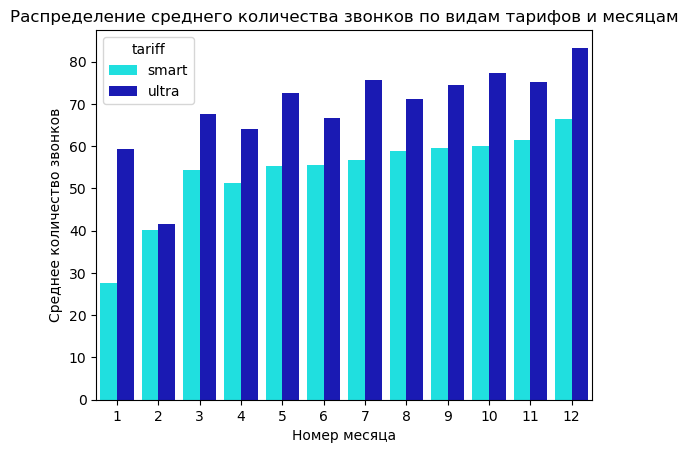

In [141]:
ax = sns.barplot(data=stats_df,
                 x='month',
                 y='calls_mean',
                 hue="tariff",
                 palette=['aqua', 'mediumblue'])

ax.set_title('Распределение среднего количества звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество звонков');

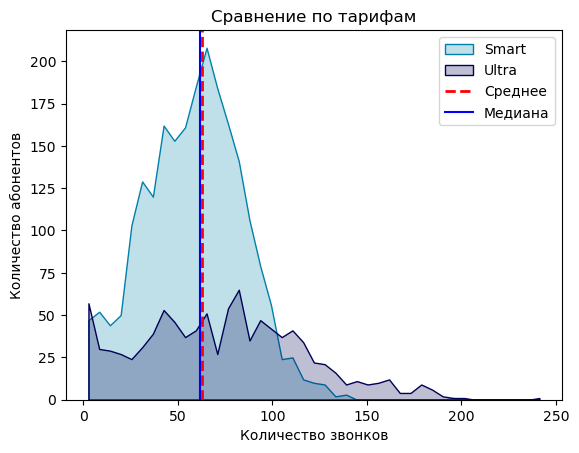

In [153]:
# Гистограмма количества звонков по тарифам
ax = sns.histplot(user_stat,
                  x='calls', 
                  hue='tariff', 
                  element='poly', 
                  palette='ocean')

ax.set_title('Сравнение по тарифам')
ax.set(xlabel='Количество звонков', ylabel='Количество абонентов')
ax.axvline(user_stat['calls'].mean(), color='r', ls='--', lw=2)
ax.axvline(user_stat['calls'].median(), color='b')
ax.legend(['Smart', 'Ultra', 'Среднее', 'Медиана']);

**Создадим** диаграмму с распределением средней *продолжительности звонков* по видам тарифов и месяцам

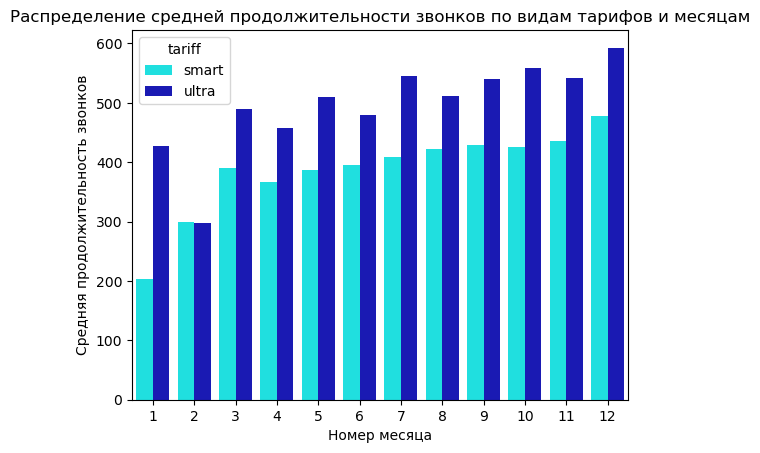

In [140]:
ax = sns.barplot(data=stats_df,
                 x='month',
                 y='minutes_mean',
                 hue="tariff",
                 palette=['aqua', 'mediumblue'])

ax.set_title('Распределение средней продолжительности звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Средняя продолжительность звонков');

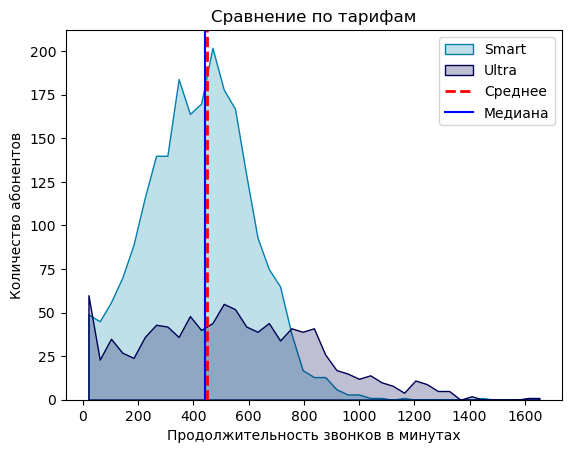

In [162]:
# Гистограмма продолжительности звонков по тарифам
ax = sns.histplot(user_stat,
                  x='minutes', 
                  hue='tariff', 
                  element='poly', 
                  palette='ocean')

ax.set_title('Сравнение по тарифам')
ax.set(xlabel='Продолжительность звонков в минутах', ylabel='Количество абонентов')
ax.axvline(user_stat['minutes'].mean(), color='r', ls='--', lw=2)
ax.axvline(user_stat['minutes'].median(), color='b')
ax.legend(['Smart', 'Ultra', 'Среднее', 'Медиана']);

- Среднее количество звонков, как и продолжительность разговоров, у абонентов тарифа `Ultra` больше, чем у абонентов тарифа `Smart`. 
- В течение года у пользователей обоих тарифов увеличивается количество и продолжительность разговоров.
- У пользователей тарифа `Ultra` рост нелинейный. Самые низкие показатели в феврале.
- Рост показателей у абонентов тарифа `Smart` равномерный в течение года, с небольшим всплеском в марте. Самые низкие показатели в январе.

---

**Создадим** диаграмму с распределением среднего количества сообщений по видам тарифов и месяцам

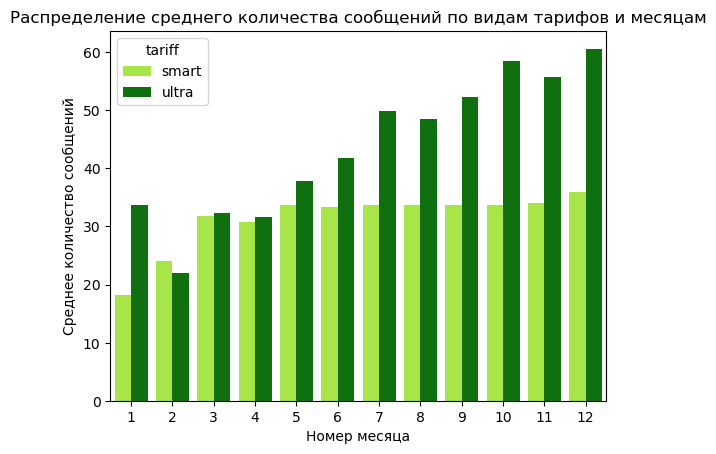

In [157]:
ax = sns.barplot(data=stats_df,
                 x='month',
                 y='messages_mean',
                 hue="tariff",
                 palette=['greenyellow', 'green'])

ax.set_title('Распределение среднего количества сообщений по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество сообщений');

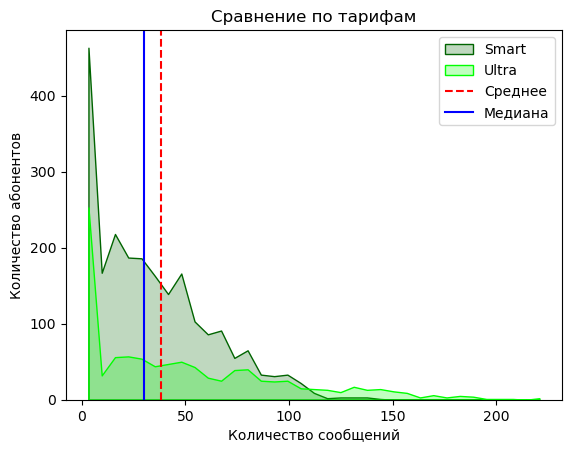

In [160]:
# Гистограмма количества сообщений по тарифам
ax = sns.histplot(user_stat,
                  x='messages', 
                  hue='tariff', 
                  element='poly', 
                  palette=['lime', 'darkgreen'])

ax.set_title('Сравнение по тарифам')
ax.set(xlabel='Количество сообщений', ylabel='Количество абонентов')
ax.axvline(user_stat['messages'].mean(), color='r', ls='--')
ax.axvline(user_stat['messages'].median(), color='b')
ax.legend(['Smart', 'Ultra', 'Среднее', 'Медиана']);

- В среднем пользователи тарифа `Ultra` отправляют больше сообщений, чем пользователи тарифа `Smart`.
- Количество сообщений у пользователей тарифа `Ultra` растет в течение года нелинейно. Самый низкий показатель в феврале.
- Количество сообщений у пользователей тарифа `Smart` растет с января по март, далее наблюдается практически одинаковое количество по месяцам. Самый низкий показатель в январе.

---

**Создадим** диаграмму с распределением среднего количества потраченного трафика в мегабайтах по видам тарифов и месяцам

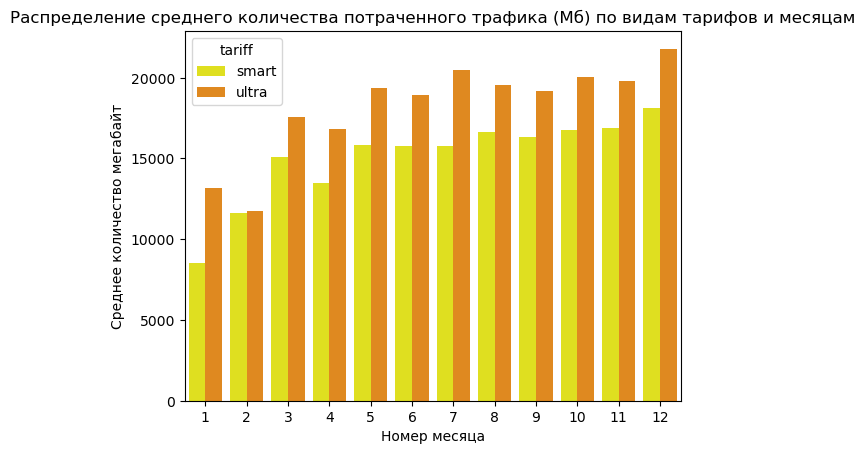

In [143]:
ax = sns.barplot(data=stats_df,
                 x='month',
                 y='sessions_mean',
                 hue='tariff',
                 palette=['yellow', 'darkorange'])

ax.set_title('Распределение среднего количества потраченного трафика (Мб) по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество мегабайт');

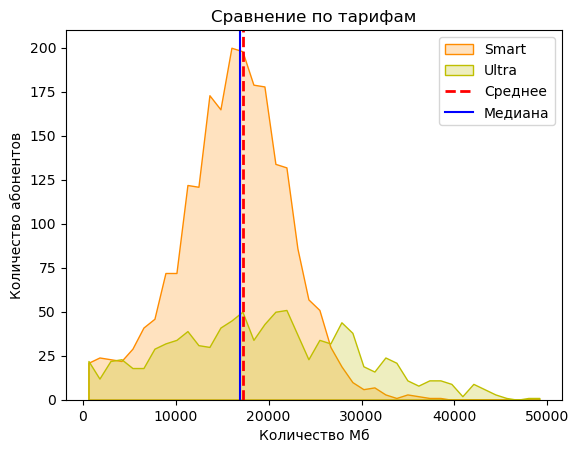

In [176]:
# Гистограмма потраченного трафика в мегабайтах по тарифам
ax = sns.histplot(user_stat,
                  x='mb_used', 
                  hue='tariff', 
                  element='poly', 
                  palette=['y', 'darkorange'])

ax.set_title('Сравнение по тарифам')
ax.set(xlabel='Количество Мб', ylabel='Количество абонентов')
ax.axvline(user_stat['mb_used'].mean(), color='r', ls='--', lw=2)
ax.axvline(user_stat['mb_used'].median(), color='b')
ax.legend(['Smart', 'Ultra', 'Среднее', 'Медиана']);

- В среднем пользователи тарифа `Ultra` расходуют больше Мб трафика, чем пользователи тарифа `Smart`.
- Количество Мб трафика у пользователей тарифа `Ultra` растет в течение года нелинейно. Самый низкий показатель в феврале.
- Количество Мб трафика у пользователей тарифа `Smart` растет с января по март, далее наблюдается небольшой спад в апреле и снова плавный, незначительный рост до конца года. Самый низкий показатель в январе.

---

### Метрики

**Посчитаем** коэффициент оттока (CR) в процентах

In [34]:
users['churn_date'].count() / users['churn_date'].shape[0] * 100  # Общий

7.6

In [35]:
users[users['tariff'] == 'ultra']['churn_date'].count() / users['churn_date'].shape[0] * 100  # Для тарифа "Ultra"

3.0

In [36]:
users[users['tariff'] == 'smart']['churn_date'].count() / users['churn_date'].shape[0] * 100  # Для тарифа "Smart"

4.6

In [37]:
round(users[users['city'] == 'Москва']['churn_date'].count() / users['churn_date'].shape[0] * 100, 1)  # Для Москвы

1.8

In [38]:
round(users[users['city'] != 'Москва']['churn_date'].count() / users['churn_date'].shape[0] * 100, 1)  # Для других регионов

5.8

**Посчитаем** среднюю выручку на каждого пользователя (ARPU)

In [39]:
(user_stat.groupby('user_id')['total_cost'].sum()/
user_stat.groupby('user_id')['month'].count()).mean()  # Общая

1550.8777635071303

In [40]:
(user_stat.query('tariff == "ultra"').groupby('user_id')['total_cost'].sum()/
user_stat.groupby('user_id')['month'].count()).mean()  # ARPU пользователей тарифа "Ultra"

2086.4646586521594

In [41]:
(user_stat.query('tariff == "smart"').groupby('user_id')['total_cost'].sum()/
user_stat.groupby('user_id')['month'].count()).mean()  # ARPU пользователей тарифа "Smart"

1324.4010192743758

In [42]:
(user_stat.query('city == "Москва"').groupby('user_id')['total_cost'].sum()/
user_stat.groupby('user_id')['month'].count()).mean()  # ARPU пользователей из Москвы

1498.465851152215

In [43]:
(user_stat.query('city != "Москва"').groupby('user_id')['total_cost'].sum()/
user_stat.groupby('user_id')['month'].count()).mean()  # ARPU пользователей из других регионов

1563.8822229636137

**Посмотрим** на срез данных по тарифам со средним и медианой по количеству звонков, смс, Мб и минут.

In [44]:
display(user_stat.loc[user_stat['tariff'] == 'smart'].describe().T[['mean', '50%']][2:6],
user_stat.loc[user_stat['tariff'] == 'ultra'].describe().T[['mean', '50%']][2:6])

,mean,50%
calls,58.463437,60.00
messages,33.384029,28.00
mb_used,16208.386990,16506.84
minutes,417.934948,422.00


,mean,50%
calls,73.392893,74.00
messages,49.363452,38.00
mb_used,19468.805208,19308.01
minutes,526.623350,518.00


<div class='alert alert-info'><b> <a id='info'></a>
    
    
- В среднем пользователи тарифа "Ultra" совершают больше звонков, расходуют больше минут, Мб и смс, чем пользователи тарифа "Smart". Логично, ведь пакет подключенных услуг у них больше.
- В течение года у пользователей тарифа "Ultra" нелинейно увеличивается количество звонков, продолжительность разговоров, количество сообщений и мегабайт трафика. Самые низкие показатели по всем параметрам в феврале.
- У пользователей тарифа "Smart" в течение года также наблюдается рост количества звонков, продолжительности разговоров и мегабайт трафика, но линейный с небольшим всплеском в марте. Количество сообщений растет с января по март, далее практически одинаковое количество по месяцам. Самые низкие показатели по всем параметрам в январе.
</b></div>

"Ultra" | Среднее | Медиана 
--- | --- | --- 
Звонки | 73 | 74
Минуты | 527 | 518
Сообщения | 49 | 38
Мегабайты | 19469 | 19308


"Smart" | Среднее | Медиана
--- | --- | ---
Звонки | 58 | 60
Минуты | 418 | 422
Сообщения | 33 | 28
Мегабайты | 16208 | 16506

## Проверка гипотез

### Первая гипотеза

**Проверка гипотезы:** средняя выручка пользователей тарифов "Ультра" и "Смарт" различается.

```
H_0: Выручка (total_cost) пользователей "Ультра" = выручка (total_cost) пользователей "Смарт"
H_a: Выручка (total_cost) пользователей "Ультра" ≠ выручка (total_cost) пользователей "Смарт"
alpha = 0.05
```

**Применим** `t-test` для сравнения двух выборок по выручке, но сначала взгянем на `размер` и `дисперсию` выборок. А также на `среднее`.

In [45]:
display(len(user_stat[user_stat['tariff'] == 'smart']['total_cost']),  # Размер
len(user_stat[user_stat['tariff'] == 'ultra']['total_cost']))

2229

985

In [46]:
display(np.var(user_stat[user_stat['tariff'] == 'smart']['total_cost']),  # Дисперсия
np.var(user_stat[user_stat['tariff'] == 'ultra']['total_cost']))

669485.2209234155

141373.07325620216

In [47]:
display(user_stat[user_stat['tariff'] == 'smart']['total_cost'].mean(),  # Среднее
user_stat[user_stat['tariff'] == 'ultra']['total_cost'].mean())

1289.9735307312696

2070.1522842639592

In [48]:
results = st.ttest_ind(user_stat[user_stat['tariff'] == 'smart']['total_cost'],
                      user_stat[user_stat['tariff'] == 'ultra']['total_cost'],
                       equal_var=False)  # Так как размер и дисперсии выборок отличаются

alpha = .05

print(results.pvalue) 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

4.2606313931076085e-250
Отвергаем нулевую гипотезу


P-value говорит нам о том, что у нас достаточно оснований отвергнуть нулевую гипотезу. Значит средняя выручка пользователей тарифов "Ультра" и "Смарт" `различается`.

---

### Вторая гипотеза

**Проверка гипотезы:** средняя выручка с пользователей из Москвы отличается от выручки c пользователей других регионов.

```
H_0: Выручка (total_cost) пользователей из Москвы = выручка (total_cost) пользователей не из Москвы
H_1: Выручка (total_cost) пользователей из Москвы ≠ выручка (total_cost) пользователей не из Москвы
alpha = 0.05
```

**Применим** `t-test` для сравнения двух выборок по выручке, но сначала `размер`, `дисперсия` и `среднее`.

In [49]:
display(len(user_stat[user_stat['city'] == 'Москва']['total_cost']),  # Размер
len(user_stat[user_stat['city'] != 'Москва']['total_cost']))

611

2603

In [50]:
display(np.var(user_stat[user_stat['city'] == 'Москва']['total_cost']),  # Дисперсия
np.var(user_stat[user_stat['city'] != 'Москва']['total_cost']))

564710.7117467293

653886.3270894091

In [51]:
display(user_stat[user_stat['city'] == 'Москва']['total_cost'].mean(),  # Среднее
user_stat[user_stat['city'] != 'Москва']['total_cost'].mean())

1546.7135842880523

1524.9362274298885

In [52]:
results = st.ttest_ind(user_stat[user_stat['city'] == 'Москва']['total_cost'],
                      user_stat[user_stat['city'] != 'Москва']['total_cost'],
                       equal_var=False)  # Так как размер и дисперсии выборок отличаются

alpha = .05

print(results.pvalue) 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


P-value говорит нам о том, что у нас недостаточно оснований отвергнуть нулевую гипотезу. Значит средняя выручка с пользователей из Москвы `не отличается` от выручки c пользователей других регионов.

---

## Общий вывод

<div class='alert alert-info'><b>    
    
- Тариф "Ultra" приносит больше выручки, чем "Smart". ARPU больше, CR меньше.
- Выручка с пользователей из Москвы незначительно отличается от выручки c пользователей других регионов. Как и ARPU. CR меньше для пользователей из Москвы.
    
[Информация по количеству звонков, минут, смс, Мб](#info)
    
</b></div>

Выручка | Среднее | Медиана | CR | ARPU                
--- | --- | --- | --- | ---                               
"Ultra" | 2070 | 1950 | 3% | 2086                                               
"Smart" | 1290 | 1023 |4.6% | 1324
"Москва" | 1547 | 1750 | 1.8% | 1498
"Другие регионы" | 1525 | 1583 | 5.8% | 1564
 |  |  |  | 
Total | 1529 | 1654 | 7.6% | 1551
